<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

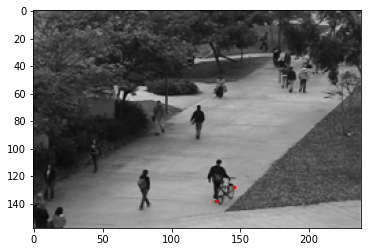

In [26]:
# figure = plt.figure(figsize=(8,8))
image = cv2.imread('vidf1_33_000_f013.png')
plt.imshow(image)

#bike points
bike_back = np.array([132, 138])
bike_front = np.array([145, 128])
plt.scatter(bike_back[0], bike_back[1], color='r', s=7)
plt.scatter(bike_front[0],bike_front[1], color='r', s=7)

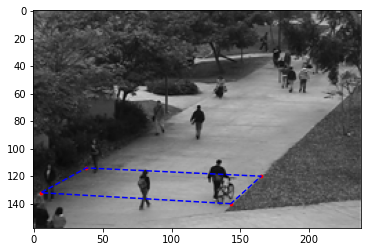

In [38]:
# figure = plt.figure(figsize=(6,6))
# figure = plt.figure(figsize=(8,8))

image = cv2.imread('vidf1_33_000_f013.png')
plt.imshow(image)
# path boundary
bottom_right = np.array([143, 140])
bottom_left = np.array([5, 132])
top_left = np.array([38, 114])
top_right = np.array([165, 120])

plt.scatter(*bottom_right, color='r', s=8)
plt.scatter(*bottom_left, color='r', s=8)
plt.scatter(*top_left,color='r', s=8)
plt.scatter(*top_right, color='r', s=8)

rectangle = np.array([bottom_right, bottom_left, top_left, top_right, bottom_right])
plt.plot(rectangle[:,0], rectangle[:,1],color='b', ls='--')

In [39]:
rectangle.shape

(5, 2)

In [40]:
inches_per_bike = 68
inch_per_meter = 39.37
meters_per_bike = inches_per_bike/inch_per_meter

bike_pixel_length = np.linalg.norm(bike_front - bike_back)
meters_per_pixel = meters_per_bike/bike_pixel_length

print('Meters/Pixel: {:.3f}'.format(meters_per_pixel))

Meters/Pixel: 0.105


In [41]:
# rectangle lengths in pixels
short_side = np.linalg.norm(bottom_right - top_right)
long_side = (np.linalg.norm(bottom_right - bottom_left) +np.linalg.norm(top_right-top_left))/2
print('Short Length: {:.2f}, Long Length: {:.2f}'.format(short_side*meters_per_pixel, long_side * meters_per_pixel))

Short Length: 3.13, Long Length: 13.97


In [46]:
# 7 pathway blocks ahead
world_bottom_left = np.array([0, 7*short_side*meters_per_pixel])
world_top_left = np.array([0,0])
world_top_right = np.array([long_side*meters_per_pixel, 0])
world_bottom_right = np.array([long_side*meters_per_pixel, 7*short_side*meters_per_pixel])

In [47]:
# Get perspective transform
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right])
world_rect = np.float32([world_bottom_left, world_top_left, world_top_right, world_bottom_right])
matrix_cam2world = cv2.getPerspectiveTransform(image_rect, world_rect)
matrix_cam2world10x = cv2.getPerspectiveTransform(image_rect, world_rect*10)

In [59]:
np.savetxt('ucsd_matrix_cam2world.txt', matrix_cam2world)

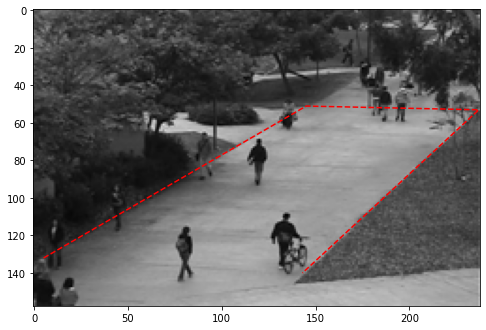

In [58]:
# Calculate ROI
figure = plt.figure(figsize=(8,8))

image = cv2.imread('vidf1_33_000_f013.png')
plt.imshow(image)

rectangle = []
for point in world_rect:
    cam_point = np.linalg.inv(matrix_cam2world) @ np.array([[point[0]], [point[1]], [1]]).reshape(3)
    rectangle.append(cam_point / cam_point[-1])
rectangle = np.array(rectangle)

plt.plot(rectangle[:,0], rectangle[:,1],color='r', ls='--')

In [60]:
rectangle

array([[  5.00000285, 131.99999835,   1.        ],
       [145.        ,  51.        ,   1.        ],
       [237.00000013,  53.        ,   1.        ],
       [142.9999959 , 140.00000153,   1.        ]])

In [61]:
world_rect

array([[ 0.      , 21.917526],
       [ 0.      ,  0.      ],
       [13.973161,  0.      ],
       [13.973161, 21.917526]], dtype=float32)

In [13]:
image_rect = np.float32([bottom_left, top_left, top_right, bottom_right]).reshape(-1,1,2)
result = cv2.perspectiveTransform(image_rect, matrix_cam2world)

In [16]:
warp = cv2.warpPerspective(image, matrix_cam2world10x, (139, 323))

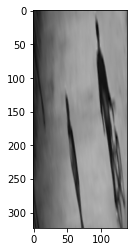

In [17]:
plt.imshow(warp)